## Python statistics essential training - 04_06_challenge

Challenge:
Using Bootstrapping on a polling data for Mayor Greens grades; estimate a 
# confidence interval for the fraction of citizens that give a passing grade (passing is >5)

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
pop = pd.read_csv('grades.csv')

In [5]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


In [6]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [7]:
#Count of voters giving passing grade in sample
print('Count Pass voters: ', pop[pop['grade']>5].count())

Count Pass voters:  grade    57
dtype: int64


In [8]:
# Fraction of voters giving passing grade in sample (100 samples)
print('fraction:', (pop[pop['grade']>5].count())/100)

fraction: grade    0.57
dtype: float64


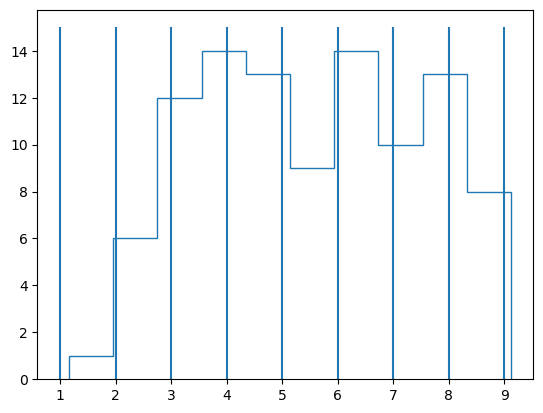

In [26]:
plt.hist(pop, bins=10, histtype='step')
plt.vlines(range(1,10), ymin=0, ymax=15)

In [28]:
#example of single instance of resample with replacement
pop.sample(100, replace=True)

,grade
58,3.536306
4,2.846912
44,3.791128
76,3.921604
63,7.687033
...,...
12,4.489596
63,7.687033
78,5.085034
57,3.784574


In [30]:
#Scipy.stats.percentileofscore() to easily determine percentace of voters giving passing grade
#in original sample:
scipy.stats.percentileofscore(pop.grade,5)

43.0

In [32]:
# repeat the resampling 1000 times and combine with the percentileofscore to create df of percent of voters giving Green a passing gradeb
pass_perc_df = pd.DataFrame({'pass_perc' : [scipy.stats.percentileofscore(pop.sample(100, replace=True).grade, 5) for i in range(1000)]})

In [35]:
pass_perc_df.head()

,pass_perc
0,50.0
1,44.0
2,42.0
3,44.0
4,51.0


array([[<Axes: title={'center': 'pass_perc'}>]], dtype=object)

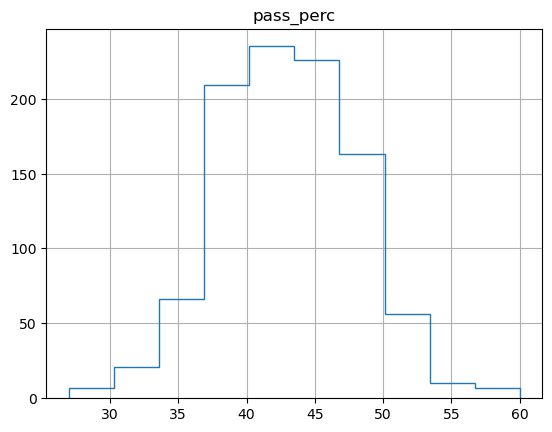

In [36]:
pass_perc_df.hist(histtype='step')

In [37]:
pass_perc_df.pass_perc.quantile(0.025), pass_perc_df.pass_perc.quantile(0.975)

(33.0, 53.0)

In [38]:
#This means that the 95% CI is 33% to 53% of voters who gave failing grades for Mayor Green